### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

### Importing mnist dataset

In [2]:
from tensorflow.keras.datasets import mnist

### Loading Data into Train and Test set

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

### Plotting Images

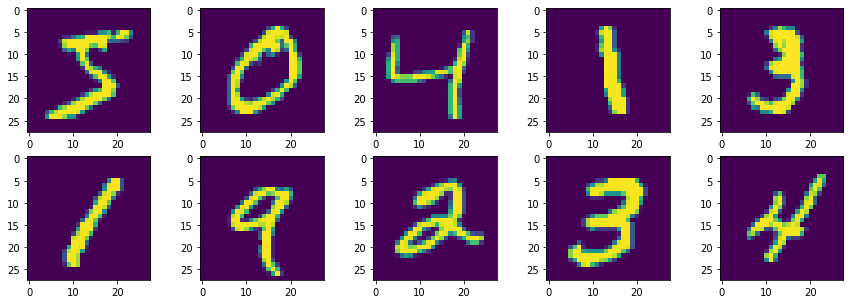

In [5]:
fig,ax = plt.subplots(2,5,figsize=(15,5))
ax[0][0].imshow(X_train[0])
ax[0][1].imshow(X_train[1])
ax[0][2].imshow(X_train[2])
ax[1][0].imshow(X_train[3])
ax[1][1].imshow(X_train[4])
ax[1][2].imshow(X_train[5])
ax[0][3].imshow(X_train[6])
ax[1][3].imshow(X_train[7])
ax[1][4].imshow(X_train[9])
ax[0][4].imshow(X_train[10])
plt.show()

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
y_train.shape

(60000,)

### Data Preprocessing

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
y_category_train = to_categorical(y_train,10)

In [10]:
y_category_train.shape

(60000, 10)

In [11]:
y_category_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [12]:
y_category_test = to_categorical(y_test,num_classes=10)

In [13]:
y_category_test.shape

(10000, 10)

In [14]:
y_category_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [15]:
X_train = X_train/255

In [16]:
X_test = X_test/255

In [17]:
X_train = X_train.reshape(60000,28,28,1)

In [18]:
X_test = X_test.reshape(10000,28,28,1)

### Model Building

In [19]:
from tensorflow.keras.models import Sequential

In [20]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [21]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [22]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

### Model Training

In [24]:
model.fit(X_train,y_category_train,epochs=10,validation_data=(X_test,y_category_test),callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 28s 463us/sample - loss: 0.1346 - acc: 0.9594 - val_loss: 0.0495 - val_acc: 0.9840
Epoch 2/10
60000/60000 [==============================] - 28s 467us/sample - loss: 0.0479 - acc: 0.9854 - val_loss: 0.0473 - val_acc: 0.9836
Epoch 3/10
60000/60000 [==============================] - 28s 464us/sample - loss: 0.0307 - acc: 0.9905 - val_loss: 0.0473 - val_acc: 0.9838
Epoch 4/10
60000/60000 [==============================] - 28s 470us/sample - loss: 0.0209 - acc: 0.9930 - val_loss: 0.0409 - val_acc: 0.9875: 
Epoch 5/10
60000/60000 [==============================] - 29s 478us/sample - loss: 0.0154 - acc: 0.9951 - val_loss: 0.0493 - val_acc: 0.9862


In [25]:
metrics = pd.DataFrame(model.history.history)

In [26]:
metrics

,loss,acc,val_loss,val_acc
0,0.134614,0.959383,0.049451,0.9840
1,0.047874,0.985417,0.047330,0.9836
2,0.030730,0.990517,0.047264,0.9838
3,0.020863,0.992983,0.040942,0.9875
4,0.015411,0.995083,0.049293,0.9862


### Plotting Model Traning and Validation Loss

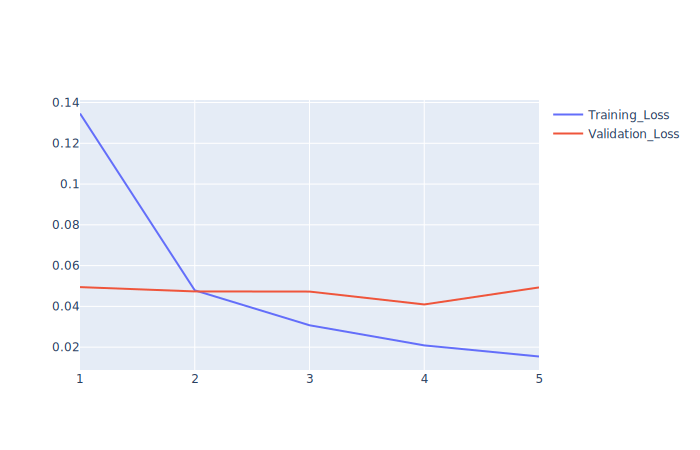

In [27]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=[1,2,3,4,5,6], y=metrics['loss'],
                    mode='lines',
                    name='Training_Loss'))
fig.add_trace(go.Scatter(x=[1,2,3,4,5,6], y=metrics['val_loss'],
                    mode='lines',
                    name='Validation_Loss'))
fig.show("svg")

### Plotting Model Traning and Validation Accuracy

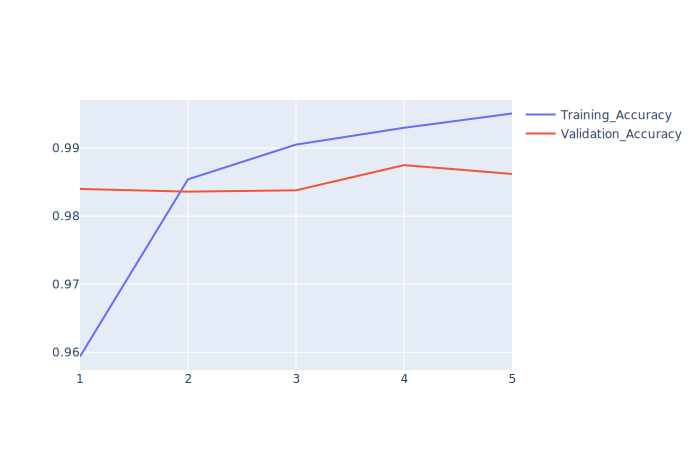

In [28]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=[1,2,3,4,5,6], y=metrics['acc'],
                    mode='lines',
                    name='Training_Accuracy'))
fig.add_trace(go.Scatter(x=[1,2,3,4,5,6], y=metrics['val_acc'],
                    mode='lines',
                    name='Validation_Accuracy'))
fig.show("svg")

### Model Evaluation

In [29]:
model.metrics_names

['loss', 'acc']

In [30]:
model.evaluate(X_test,y_category_test,verbose=0)

[0.0492927012774584, 0.9862]

In [31]:
from sklearn.metrics import classification_report,confusion_matrix

In [32]:
predictions = model.predict_classes(X_test)

In [33]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [34]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.97      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



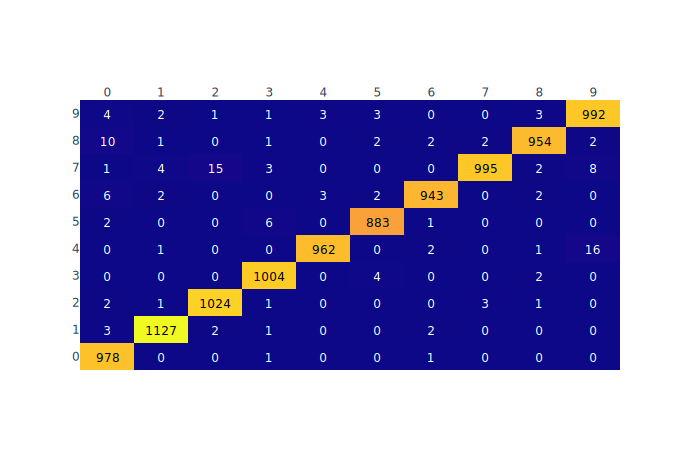

In [35]:
import plotly.figure_factory as ff
fig = ff.create_annotated_heatmap(confusion_matrix(y_test,predictions),x=[0,1,2,3,4,5,6,7,8,9],y=[0,1,2,3,4,5,6,7,8,9])
fig.show("svg")          

In [36]:
my_number = X_test[6]

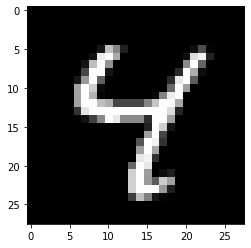

In [37]:
plt.imshow(my_number.reshape(28,28),cmap='gray')

In [38]:
#num_images,width,height,color_channels
pred=model.predict_classes(my_number.reshape(1,28,28,1))

In [39]:
pred

array([4], dtype=int64)

### Let's Create a Simple GUI

In [41]:
import gradio as gr

In [44]:
def recognize_digit(inp):
    prediction = model.predict(inp.reshape(1, 28, 28, 1)).tolist()[0]
    return {str(i): prediction[i] for i in range(10)}

sketchpad = gr.inputs.Sketchpad()
label = gr.outputs.Label(num_top_classes=3)

interface = gr.Interface(fn=recognize_digit, inputs=sketchpad,outputs=label, live=False,capture_session=True)

In [45]:
interface.launch()

Running locally at: http://127.0.0.1:7861/


(<gradio.networking.serve_files_in_background.<locals>.HTTPServer at 0x22055267688>,
 'http://127.0.0.1:7861/',
 None)